In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cclw = pd.read_csv('../data/laws_and_policies_28062022.csv')
cclw = cclw[pd.notna(cclw["Responses"])]
cclw = cclw[cclw['Responses'].str.lower().str.contains("mitigation")]
cclw.head()

,Id,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,Keywords,Sectors,Events,Documents,Parent Legislation,Description
0,4620,Energy Sector Strategy 1387-1391 (2007/8-2012/3),executive,Afghanistan,AFG,NaN,Mitigation,"Capacity building|Governance;Processes, plans ...",Strategy,NaN,Energy Supply,Energy,25/12/2008|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,This strategy sets the vision and goals for th...
2,4622,National Forestry Management Policy (NFMP),executive,Afghanistan,AFG,NaN,Adaptation;Mitigation,"Research & Development, knowledge generation|I...",Policy,NaN,Research And Development,Economy-wide,25/12/2007|Law passed||,NaN,NaN,"This law was identified in Afghanistan's NDC, ..."
8,8728,National Renewable Energy Policy,executive,Afghanistan,AFG,NaN,Mitigation,Subsidies|Economic;Tax incentives|Economic,Policy,NaN,Carbon Pricing;Energy Supply;Energy Demand,Energy;Transport,25/12/2015|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,This document sets the government's renewable ...
10,9527,National Renewable Energy Policy (ANREP),executive,Afghanistan,AFG,NaN,Adaptation;Mitigation,"Capacity building|Governance;Processes, plans ...",Policy,NaN,Renewables;Energy,Energy,01/01/2015|Approved||,Full text (PDF)|https://policy.asiapacificener...,NaN,The National Renewable Energy Policy (ANREP) a...
11,9528,Afghanistan National Peace and Development Fra...,executive,Afghanistan,AFG,NaN,Adaptation;Disaster Risk Management;Mitigation,Tax incentives|Economic;Capacity building|Gove...,Framework,Flood,Health;Taxes;Energy;Forest,Agriculture;Economy-wide;Energy;Health;Waste;W...,01/01/2017|Approved||,Full text (PDF)|https://climate-laws.org/rails...,NaN,The Afghanistan National Peace and Development...


In [2]:
cclw['date'] = cclw["Events"].astype(str).apply(lambda x: x.split("|")[0])
cclw['date'] = pd.to_datetime(cclw['date'])


/tmp/ipykernel_124805/1799441901.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cclw['date'] = pd.to_datetime(cclw['date'])


In [3]:
import re
def widen_column(df, column, sep='|||'):
    df = df.copy()
    columns = set([])
    for x in df[column].unique():
        for s in re.split(sep, str(x)): #.split(sep):
            s = s.strip()
            if s =="nan" or s=="None" or s=="" or s is None or "no information" in s.lower() or s=="Other":
                continue
            columns.add(s.strip())
            
    for c in columns:
        print(repr(c))
        df.loc[:,c] = 0
        df.loc[df[column].str.contains(c, regex=False)==True,c] = 1
        
    return df, columns

cclw["Instruments"] = cclw["Instruments"].str.replace("knowledge generation","Knowledge sharing and dissemination")
cclw["Instruments"] = cclw["Instruments"].str.replace("Education, training and knowledge dissemination","Knowledge sharing and dissemination")
cclw["Instruments"] = cclw["Instruments"].str.replace('Research & Development, Knowledge sharing and dissemination'
,"Research & Development; Knowledge sharing and dissemination")
cclw["Instruments"] = cclw["Instruments"].str.replace("Research & Developoment","Research and development")
cclw["Instruments"] = cclw["Instruments"].str.replace("Tax incentives","Taxes")
cclw["Instruments"] = cclw["Instruments"].str.replace("Standards, obligations and norms","Standards and obligations")
cclw["Instruments"] = cclw["Instruments"].str.replace("Direct Investment","Direct investment")
cclw["Instruments"] = cclw["Instruments"].str.replace("Capacity building","Capacity-building")



cclw_wide, columns = widen_column(cclw[["Id","Instruments"]], "Instruments", r"\||;")
cclw_wide.head()

'Institutional mandates'
'Zoning & Spatial Planning'
'Planning'
'Green procurement'
'Subnational and citizen participation'
'Early warning systems'
'Nature based solutions and ecosystem restoration'
'Economic'
'Knowledge sharing and dissemination'
'Processes, plans and strategies'
'Standards and obligations'
'Governance'
'Climate finance tools'
'Taxes'
'Insurance'
'MRV'
'Direct investment'
'Disclosure obligations'
'Moratoria & bans'
'Carbon pricing & emissions trading'
'Research & Development'
'Provision of climate funds'
'Capacity-building'
'Information'
'Regulation'
'Subsidies'
'International cooperation'


,Id,Instruments,Institutional mandates,Zoning & Spatial Planning,Planning,Green procurement,Subnational and citizen participation,Early warning systems,Nature based solutions and ecosystem restoration,Economic,...,Disclosure obligations,Moratoria & bans,Carbon pricing & emissions trading,Research & Development,Provision of climate funds,Capacity-building,Information,Regulation,Subsidies,International cooperation
0,4620,"Capacity-building|Governance;Processes, plans ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4622,Research & Development; Knowledge sharing and ...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,8728,Subsidies|Economic;Taxes|Economic,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,9527,"Capacity-building|Governance;Processes, plans ...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
11,9528,Taxes|Economic;Capacity-building|Governance;Su...,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
cclw_wide['Governance'].sum() / cclw_wide.shape[0]

0.7837706511175899

In [5]:
cclw_wide[cclw_wide['Governance']==1][list(columns)].sum()

Institutional mandates                               257
Zoning & Spatial Planning                             26
Planning                                              28
Green procurement                                      2
Subnational and citizen participation                150
Early warning systems                                 25
Nature based solutions and ecosystem restoration      87
Economic                                             251
Knowledge sharing and dissemination                  288
Processes, plans and strategies                     1363
Standards and obligations                            196
Governance                                          1613
Climate finance tools                                  4
Taxes                                                153
Insurance                                              4
MRV                                                  195
Direct investment                                    225
Disclosure obligations         

In [6]:
sector_titles = [
    'AFOLU',
    'Buildings',
    'Energy',
    'Industry',
    'Transport',
    'Waste',
    'Cross-sectoral'
]

cclw["Sectors"] = cclw["Sectors"].str.replace("LULUCF","AFOLU").str.replace("Agriculture","AFOLU")
cclw_wide_sector, sector_columns = widen_column(cclw[["Id","Sectors"]], "Sectors", r"\||;")
cclw_wide_sector['Cross-sectoral'] = 0
cclw_wide_sector.loc[(cclw_wide_sector['Cross Cutting Area']>0) | (cclw_wide_sector['Economy-wide']>0),'Cross-sectoral'] = 1
cclw_wide_sector = cclw_wide_sector[['Id','Sectors'] + sector_titles]
cclw_wide_sector.head()

'Rural'
'Water'
'Waste'
'Environment'
'Buildings'
'Industry'
'Transport'
'Coastal zones'
'Urban'
'Tourism'
'Economy-wide'
'AFOLU'
'Adaptation'
'Health'
'Finance'
'Disaster Risk Management (Drm)'
'Energy'
'Social development'
'Public Sector'
'Cross Cutting Area'


,Id,Sectors,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,4620,Energy,0,0,1,0,0,0,0
2,4622,Economy-wide,0,0,0,0,0,0,1
8,8728,Energy;Transport,0,0,1,0,1,0,0
10,9527,Energy,0,0,1,0,0,0,0
11,9528,AFOLU;Economy-wide;Energy;Health;Waste;Water,1,0,1,0,0,1,1


In [7]:
import gspread
import numpy as np
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./jupyter-google-e4b72bf44320.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '15RN38inB4aGedpzFaDw2y0p4L9ecqvo_2AW4Oea4whw'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("New Climate Institute categories")

table = ws.get_all_values()

gws = wb.worksheet("Grantham categories")
gran_table = gws.get_all_values()

gran_df = pd.DataFrame(gran_table[2:], columns=gran_table[1])
gran_df

,Level 2,Level 1,Our Typology III,Our Typology II,Our Typology I,MCC II,MCC I
0,Knowledge sharing and dissemination,Capacity-building,Public Information/awareness campaigns,,,Public Information/awareness campaigns,"Information, education and training"
1,Capacity-building - general,Capacity-building,Education and training,,,Education and training,"Information, education and training"
2,Knowledge generation,Capacity-building,Publication of data / analysis,,,Publication of data / analysis,"Information, education and training"
3,Education and training,Capacity-building,Education and training,,,Education and training,"Information, education and training"
4,Research and development,Capacity-building,R&D investments,,,Direct Investment / spending,Economic instruments
...,...,...,...,...,...,...,...
61,Creating bodies and institutions,,Policy Coordination,,,Institutions,"Governance, strategies and targets"
62,Creating bodies and institutions,,Expert advice,,,Institutions,"Governance, strategies and targets"
63,Creating bodies and institutions,,Performance Reviews,,,Institutions,"Governance, strategies and targets"
64,Creating bodies and institutions,,Stakeholder Engagement,,,Institutions,"Governance, strategies and targets"


In [8]:

for i, row in gran_df.iterrows():
    # if row['MCC I']=='Governance, strategies and targets':
    #     print(row['Level 1'])
    #     print(row['Level 2'])
    #     #print(row['Instrument category'])
    if row["Level 2"] != "":
        if row["Level 2"] in cclw_wide.columns:
            cclw_wide.loc[cclw_wide[row["Level 2"]]==1,row["MCC I"]] = 1
        else:
            pass
            #print(row["Level 2"])
        
    elif row["Level 1"] != "":
        if row["Level 1"] in cclw_wide.columns:
            cclw_wide.loc[cclw_wide[row["Level 1"]]==1,row["MCC I"]] = 1
        else:
            pass
            #print(repr(row["Level 1"]))

new_cols = [x for x in gran_df["MCC I"].unique() if x!=""]

gran_mcc = cclw_wide[["Id"] + list(new_cols)].fillna(0)
gran_mcc

,Id,"Information, education and training",Economic instruments,"Governance, strategies and targets",Regulatory Instruments,Agreements
0,4620,0.0,0.0,1.0,0.0,0.0
2,4622,1.0,0.0,0.0,0.0,0.0
8,8728,0.0,1.0,0.0,0.0,0.0
10,9527,1.0,0.0,1.0,0.0,1.0
11,9528,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2672,1808,0.0,0.0,1.0,0.0,0.0
2678,9394,0.0,1.0,0.0,0.0,0.0
2679,9395,0.0,0.0,1.0,0.0,0.0
2680,10355,0.0,0.0,1.0,0.0,0.0


In [9]:
gran_mcc[gran_mcc['Regulatory Instruments']==1].shape[0] / gran_mcc.shape[0]

0.2001943634596696

In [10]:
for x in cclw[cclw['Id'].isin(gran_mcc[gran_mcc['Governance, strategies and targets']==1].Id)].head(8)['Instruments'].values:
    print('\n',x)


 Capacity-building|Governance;Processes, plans and strategies|Governance

 Capacity-building|Governance;Processes, plans and strategies|Governance;Subnational and citizen participation|Governance;International cooperation|Governance;Knowledge sharing and dissemination|Information

 Taxes|Economic;Capacity-building|Governance;Subnational and citizen participation|Governance

 Capacity-building|Governance;Processes, plans and strategies|Governance

 Capacity-building|Governance;Processes, plans and strategies|Governance

 Capacity-building|Governance;Processes, plans and strategies|Governance

 Processes, plans and strategies|Governance

 Processes, plans and strategies|Governance;MRV|Governance;International cooperation|Governance


In [11]:
nci = pd.read_csv("../data/climate_policy_database_policies_export.csv")
nci.head()

,policy_id,country_iso,country_update,policy_name,policy_title,jurisdiction,supranational_region,country,subnational_region,policy_city_or_local,...,end_date,high_impact,policy_objective,reference,last_update,impact_indicators.comments,impact_indicators.name,impact_indicators.value,impact_indicators.base_year,impact_indicators.target_year
0,211001480,FRA,Sporadic,Incandescent Lamp Phase-out France (2008),Incandescent Lamp Phase-out,Country,NaN,France,NaN,NaN,...,NaN,Unknown,"Mitigation, Energy access",http://www.developpement-durable.gouv.fr/artic...,NaN,NaN,NaN,NaN,NaN,NaN
1,211001564,IDN,Annual,Jakarta Regulation No. 38/12 on Green Building...,Jakarta Regulation No. 38/12 on Green Buildings,City,NaN,Indonesia,Jakarta,NaN,...,NaN,Unknown,Mitigation,https://www.iea.org/policies/2523-jakarta-regu...,NaN,NaN,NaN,NaN,NaN,NaN
2,211002621,AUS,Annual,Safeguarding the Future: Australia (1998),Safeguarding the Future:,Country,NaN,Australia,NaN,NaN,...,2007.0,Unknown,Mitigation,http://www.climatechange.gov.au,NaN,NaN,NaN,NaN,NaN,NaN
3,211004420,BRB,Sporadic,National Climate Change Policy Barbados (2012),National Climate Change Policy,Country,NaN,Barbados,NaN,NaN,...,NaN,Unknown,"Mitigation, Adaptation",http://gisbarbados.gov.bb/blog/barbados-nation...,NaN,NaN,NaN,NaN,NaN,NaN
4,211004934,BGR,Sporadic,Spatial Planning Act Bulgaria (2001),Spatial Planning Act,Country,NaN,Bulgaria,NaN,NaN,...,NaN,NaN,Mitigation,https://www.mrrb.bg/en/spatial-development-act...,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
nci_wide_sector, columns = widen_column(nci[["policy_id","sector"]], "sector", r",")
nci_wide_sector.head()

'Renewables'
'Fluorinated gases'
'Light-duty vehicles'
'Industrial process CO2'
'Buildings'
'Industry'
'Transport'
'Hot water and cooking'
'Oil'
'Air'
'Forestry'
'Agriculture and forestry'
'Appliances'
'CCS'
'Agricultural CO2'
'Rail'
'Nuclear'
'Negative emissions'
'Agricultural CH4'
'Industrial N2O'
'Electricity and heat'
'Heating and cooling'
'Shipping'
'Fossil fuel exploration and production'
'Low-emissions mobility'
'Construction'
'Waste CH4'
'Coal'
'General'
'Industrial energy related'
'Heavy-duty vehicles'
'Agricultural N2O'
'Gas'


,policy_id,sector,Renewables,Fluorinated gases,Light-duty vehicles,Industrial process CO2,Buildings,Industry,Transport,Hot water and cooking,...,Fossil fuel exploration and production,Low-emissions mobility,Construction,Waste CH4,Coal,General,Industrial energy related,Heavy-duty vehicles,Agricultural N2O,Gas
0,211001480,"Buildings, Appliances",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,211001564,"Buildings, Construction",0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,211002621,Electricity and heat,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,211004420,General,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,211004934,General,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
sector_titles = [
    'AFOLU',
    'Buildings',
    'Energy',
    'Industry',
    'Transport',
    'Waste',
    'Cross-sectoral'
]
sector_map = {
    'Agriculture and forestry': 'AFOLU',
    'Buildings': 'Buildings',
    'Electricity and heat': 'Energy',
    'Industry': 'Industry',
    'Transport': 'Transport',
    #'': 'Waste, # waste CH4 does not refer to the waste sector, which is not included here
    'General': 'Cross-sectoral'
}
nci_sector = nci[['policy_id']].copy()
for k, v in sector_map.items():
    nci_sector[v] = nci_wide_sector[k]
nci_sector

,policy_id,AFOLU,Buildings,Energy,Industry,Transport,Cross-sectoral
0,211001480,0,1,0,0,0,0
1,211001564,0,1,0,0,0,0
2,211002621,0,0,1,0,0,0
3,211004420,0,0,0,0,0,1
4,211004934,0,0,0,0,0,1
...,...,...,...,...,...,...,...
5957,220205795,0,0,0,0,0,1
5958,211002456,0,1,0,0,0,0
5959,211000463,0,0,1,0,0,0
5960,211002974,0,0,0,0,0,1


In [14]:
nci_wide, columns = widen_column(nci[["policy_id","policy_instrument"]], "policy_instrument", r",")
nci.head()

'Performance label'
'Tendering schemes'
'Formal & legally binding energy efficiency target'
'Formal & legally binding climate strategy'
'Negotiated agreements (public-private sector)'
'Strategic planning'
'Information and education'
'Climate strategy'
'Target'
'Industrial air pollution standards'
'Procurement rules'
'User charges'
'Retirement premium'
'Fiscal or financial incentives'
'Formal & legally binding GHG reduction target'
'Demonstration project'
'Other mandatory requirements'
'Obligation schemes'
'Coordinating body for climate strategy'
'Net metering'
'Political & non-binding energy efficiency target'
'Infrastructure investments'
'Technology development'
'Regulatory Instruments'
'Codes and standards'
'Loans'
'Political & non-binding climate strategy'
'Advice or aid in implementation'
'Sectoral standards'
'Removal of fossil fuel subsidies'
'Unilateral commitments (private sector)'
'Vehicle air pollution standards'
'White certificates'
'Barrier removal'
'Monitoring'
'Comparison 

,policy_id,country_iso,country_update,policy_name,policy_title,jurisdiction,supranational_region,country,subnational_region,policy_city_or_local,...,end_date,high_impact,policy_objective,reference,last_update,impact_indicators.comments,impact_indicators.name,impact_indicators.value,impact_indicators.base_year,impact_indicators.target_year
0,211001480,FRA,Sporadic,Incandescent Lamp Phase-out France (2008),Incandescent Lamp Phase-out,Country,NaN,France,NaN,NaN,...,NaN,Unknown,"Mitigation, Energy access",http://www.developpement-durable.gouv.fr/artic...,NaN,NaN,NaN,NaN,NaN,NaN
1,211001564,IDN,Annual,Jakarta Regulation No. 38/12 on Green Building...,Jakarta Regulation No. 38/12 on Green Buildings,City,NaN,Indonesia,Jakarta,NaN,...,NaN,Unknown,Mitigation,https://www.iea.org/policies/2523-jakarta-regu...,NaN,NaN,NaN,NaN,NaN,NaN
2,211002621,AUS,Annual,Safeguarding the Future: Australia (1998),Safeguarding the Future:,Country,NaN,Australia,NaN,NaN,...,2007.0,Unknown,Mitigation,http://www.climatechange.gov.au,NaN,NaN,NaN,NaN,NaN,NaN
3,211004420,BRB,Sporadic,National Climate Change Policy Barbados (2012),National Climate Change Policy,Country,NaN,Barbados,NaN,NaN,...,NaN,Unknown,"Mitigation, Adaptation",http://gisbarbados.gov.bb/blog/barbados-nation...,NaN,NaN,NaN,NaN,NaN,NaN
4,211004934,BGR,Sporadic,Spatial Planning Act Bulgaria (2001),Spatial Planning Act,Country,NaN,Bulgaria,NaN,NaN,...,NaN,NaN,Mitigation,https://www.mrrb.bg/en/spatial-development-act...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("New Climate Institute categories")

nci_table = ws.get_all_values()

nci_df = pd.DataFrame(nci_table[2:], columns=nci_table[1])
nci_df

,Policy instrument,Sub-category,Instrument category,Our Typology III,Our Typology II,Our Typology I,MCC II,MCC I
0,Funds to sub-national governments,Direct investment,Economic instruments,Other investments,,,Direct Investment / spending,Economic instruments
1,Infrastructure investments,Direct investment,Economic instruments,Infrastructure Investments,,,Direct Investment / spending,Economic instruments
2,Procurement rules,Direct investment,Economic instruments,Government Green procurement rules,,,Standards,Regulatory Instruments
3,RD&D funding,Direct investment,Economic instruments,R&D investments,,,Direct Investment / spending,Economic instruments
4,Research & Development and Deployment (RD&D),Direct investment,Economic instruments,R&D investments,,,Direct Investment / spending,Economic instruments
...,...,...,...,...,...,...,...,...
80,Institutional creation,,,Policy Coordination,,,Institutions,"Governance, strategies and targets"
81,Institutional creation,,,Expert advice,,,Institutions,"Governance, strategies and targets"
82,Institutional creation,,,Performance Reviews,,,Institutions,"Governance, strategies and targets"
83,,,Policy support,Stakeholder Engagement,,,Institutions,"Governance, strategies and targets"


In [16]:
nci_wide.columns

Index(['policy_id', 'policy_instrument', 'Performance label',
       'Tendering schemes',
       'Formal & legally binding energy efficiency target',
       'Formal & legally binding climate strategy',
       'Negotiated agreements (public-private sector)', 'Strategic planning',
       'Information and education', 'Climate strategy', 'Target',
       'Industrial air pollution standards', 'Procurement rules',
       'User charges', 'Retirement premium', 'Fiscal or financial incentives',
       'Formal & legally binding GHG reduction target',
       'Demonstration project', 'Other mandatory requirements',
       'Obligation schemes', 'Coordinating body for climate strategy',
       'Net metering', 'Political & non-binding energy efficiency target',
       'Infrastructure investments', 'Technology development',
       'Regulatory Instruments', 'Codes and standards', 'Loans',
       'Political & non-binding climate strategy',
       'Advice or aid in implementation', 'Sectoral standards',


In [17]:
for i, row in nci_df.iterrows():
    if row['MCC I']=='Regulatory Instruments':
        print()
        print(row['Policy instrument'])
        print(row['Sub-category'])
        print(row['Instrument category'])
    if re.search('\w',row["Policy instrument"]):
        if row["Policy instrument"] in nci_wide.columns:
            nci_wide.loc[nci_wide[row["Policy instrument"]]==1,row["MCC I"]] = 1
        else:
            print(row["Policy instrument"])
        
    elif re.search('\w',row["Sub-category"]):
        if row["Sub-category"] in nci_wide.columns:
            nci_wide.loc[nci_wide[row["Sub-category"]]==1,row["MCC I"]] = 1
        else:
            print(repr(row["Sub-category"]))
            
    elif re.search('\w',row["Instrument category"]):
        if row["Instrument category"] in nci_wide.columns:
            nci_wide.loc[nci_wide[row["Instrument category"]]==1,row["MCC I"]] = 1
        else:
            print(repr(row["Instrument category"]))
            
new_cols = [x for x in nci_df["MCC I"].unique() if x!=""]

nci_mcc = nci_wide[["policy_id"] + list(new_cols)].fillna(0)
nci_mcc


Procurement rules
Direct investment
Economic instruments

Green certificates
Market-based instruments
Economic instruments

White certificates
Market-based instruments
Economic instruments

Building codes and standards
Codes and standards
Regulatory Instruments

Product standards
Codes and standards
Regulatory Instruments

Sectoral standards
Codes and standards
Regulatory Instruments

Vehicle fuel-economy and emissions standards
Codes and standards
Regulatory Instruments

Auditing
Codes and standards
Regulatory Instruments

Monitoring
Codes and standards
Regulatory Instruments

Obligation schemes
Codes and standards
Regulatory Instruments

Other mandatory requirements
Codes and standards
Regulatory Instruments

Industrial air pollution standards
Codes and standards
Regulatory Instruments

Vehicle air pollution standards
Codes and standards
Regulatory Instruments

Comparison label
Performance label
Information and education

Endorsement label
Performance label
Information and education

,policy_id,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements
0,211001480,0,0,1.0,0.0,1.0
1,211001564,0,1,0.0,0.0,0.0
2,211002621,0,0,0.0,0.0,1.0
3,211004420,0,0,0.0,1.0,0.0
4,211004934,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...
5957,220205795,0,0,0.0,1.0,0.0
5958,211002456,0,1,0.0,0.0,0.0
5959,211000463,1,0,0.0,0.0,0.0
5960,211002974,0,0,1.0,0.0,0.0


In [18]:
#dict(list(nci_wide[nci_wide['Governance, strategies and targets']==1].iterrows())[0][1])

In [19]:
nci_mcc[nci_mcc['Regulatory Instruments']==1].shape[0] / nci_mcc.shape[0]

0.287319691378732

In [20]:
# list(nci[
#     nci['policy_id'].isin(nci_mcc[nci_mcc['Regulatory Instruments']==1].policy_id)
# ]['policy_instrument'].values)

In [21]:
#cclw["title"] = cclw["Title"].str.lower()
#nci["title"] = nci["policy_title"].str.lower()

texts = list(cclw['Title']) + list(nci['policy_title'])
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b')
vec.fit(texts)


CountVectorizer(token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')

In [23]:
import os
if not os.path.exists('../data/deduplication_candidates.csv'):
    from sentence_transformers import SentenceTransformer, util
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    pairs = []

    cclw['max_sim'] = 0.0
    cclw['max_embed_sim'] = 0.0
    cclw['policy_id'] = None

    countries = set(cclw['Geography ISO']) | set(nci['country_iso'])
    for c in countries:
        for i, crow in cclw[cclw['Geography ISO']==c].iterrows():
            cyear = crow.date.year
            comp_years = [cyear-1,cyear,cyear+1]
            for j, nrow in nci[(nci['country_iso']==c) & (nci['decision_date'].isin(comp_years))].iterrows():
                # Calculate similarity
                t1 = vec.transform([crow['Title'].lower()]).todense().A1
                t2 = vec.transform([nrow['policy_title'].lower()]).todense().A1
                sim = np.dot(t1,t2)/(np.linalg.norm(t1)*np.linalg.norm(t2))

                e1 = model.encode(crow['Title'], convert_to_tensor=True)
                e2 = model.encode(nrow['policy_title'], convert_to_tensor=True)
                embed_sim = np.dot(e1,e2)/(np.linalg.norm(e1)*np.linalg.norm(e2))


                # Do the texts match?
                match = crow['Title'].lower() == nrow['policy_title'].lower()
                pairs.append({
                    'cclw_id': crow['Id'],
                    'nci_id': nrow['policy_id'],
                    'cclw_title': crow['Title'],
                    'nci_title': nrow['policy_title'],
                    'nci_policy_id': nrow['policy_id'],
                    'sim': sim,
                    'embed_sim': embed_sim,
                    'match': match,
                    'cclw_year': cyear,
                    'nci_year': nrow['decision_date']
                })
                if sim > crow['max_sim']:
                    crow['max_sim']=sim
                    cclw.loc[cclw['Id']==crow['Id'],'max_sim'] = sim
                    cclw.loc[cclw['Id']==crow['Id'],'sim_policy_id'] = nrow['policy_id']
                    if sim > 0.78:
                        cclw.loc[cclw['Id']==crow['Id'],'policy_id'] = nrow['policy_id']
                if embed_sim > crow['max_embed_sim']:
                    crow['max_embed_sim']=embed_sim
                    cclw.loc[cclw['Id']==crow['Id'],'max_embed_sim'] = embed_sim
                    # if sim > 0.78:
                    #     cclw.loc[cclw['Id']==crow['Id'],'policy_id'] = nrow['policy_id']

    deduplication = cclw[['Id','Title','sim_policy_id','max_sim']].merge(
        nci[['policy_title','policy_id']],
        left_on='sim_policy_id',
        right_on='policy_id'
    ).sort_values('max_sim', ascending=False).reset_index(drop=True)
    deduplication.to_csv('../data/deduplication_candidates.csv', index=False)

else:
    deduplication = pd.read_csv('../data/deduplication_candidates.csv')
    
deduplication.head()

,Id,Title,sim_policy_id,max_sim,policy_title,policy_id
0,1481,Strategy for New and Renewable Development 201...,211004954.0,1.0,Strategy for New and Renewable Development 201...,211004954
1,1220,Climate Change Act 609/2015,211003561.0,1.0,Climate Change Act,211003561
2,1755,Climate Change Act,211000492.0,1.0,Climate Change Act,211000492
3,1754,Feed-in Tariffs for renewable electricity,211001152.0,1.0,Feed-in Tariffs for renewable electricity,211001152
4,9225,Plan for cycling and active mobility,211002267.0,1.0,Plan for Cycling and Active Mobility,211002267


Text(0, 0.5, 'Number of CCLW policies')

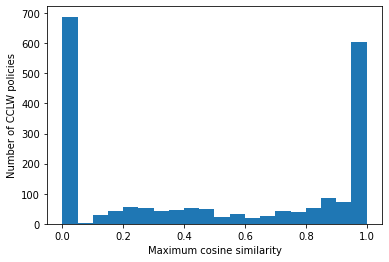

In [38]:
fig, ax = plt.subplots()

ax.hist(
    cclw.merge(deduplication, how='left')['max_sim'].fillna(0),

    bins=20
)
ax.set_xlabel('Maximum cosine similarity')
ax.set_ylabel('Number of CCLW policies')

Text(0, 0.5, 'Cumulative number of CCLW policies')

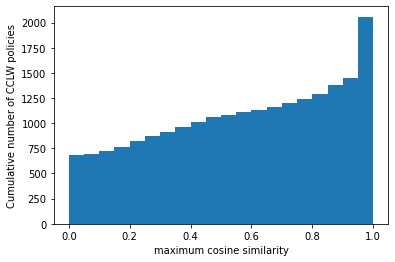

In [36]:
fig, ax = plt.subplots()

ax.hist(
    cclw.merge(deduplication, how='left')['max_sim'].fillna(0),
    cumulative=True,
    histtype='stepfilled',
    bins=20
)
ax.set_xlabel('maximum cosine similarity')
ax.set_ylabel('Cumulative number of CCLW policies')

Text(0, 0.5, 'Number of policies')

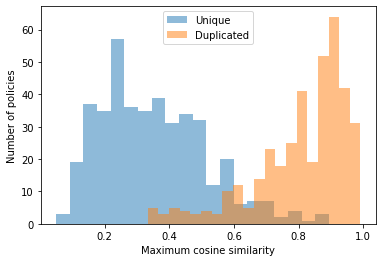

In [40]:
deduplicated = pd.read_excel('../data/deduplication_candidates_resolved.xlsx')
if 'policy_id' in cclw.columns:
    cclw = cclw.drop(columns='policy_id')
cclw = cclw.merge(deduplicated.query('duplicated==1')[['Id','policy_id']], how='left')
fig, ax = plt.subplots()
labels = ['Unique','Duplicated']
i = 0
for name, group in deduplicated.query('max_sim<0.999').groupby('duplicated'):
    ax.hist(group['max_sim'], alpha=0.5, bins=20, label=labels[i])
    i+=1
ax.legend()
ax.set_xlabel('Maximum cosine similarity')
ax.set_ylabel('Number of policies')

In [41]:
deduplicated.query('max_sim<0.999')['duplicated'].sum()

383

In [43]:
deduplicated.query('max_sim<0.999').query('duplicated==False').shape[0]

420

In [24]:
both = cclw.merge(
    nci, 
    left_on=["policy_id"], 
    right_on=["policy_id"], 
    how="inner"
)

print(
    cclw.shape[0] - both.shape[0],
    nci.shape[0] - both.shape[0],
    both.shape[0]
)
both

1107 5011 951


,Id,Title,Type,Geography,Geography ISO,Frameworks,Responses,Instruments,Document Types,Natural Hazards,...,end_date,high_impact,policy_objective,reference,last_update,impact_indicators.comments,impact_indicators.name,impact_indicators.value,impact_indicators.base_year,impact_indicators.target_year
0,1001,Regulatory Order fixing the guaranteed purchas...,executive,Algeria,DZA,NaN,Mitigation,NaN,Decree/Order/Ordinance,NaN,...,NaN,NaN,Mitigation,https://www.climate-laws.org/geographies/alger...,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,The National Climate Plan,executive,Algeria,DZA,Adaptation;Mitigation,Adaptation;Mitigation,"Processes, plans and strategies|Governance",Plan,NaN,...,NaN,Unknown,"Mitigation, Adaptation",http://www.lse.ac.uk/GranthamInstitute/law/the...,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,Executive Decree No. 2011-423 fixing the opera...,executive,Algeria,DZA,NaN,Mitigation,Subsidies|Economic,Decree/Order/Ordinance,NaN,...,NaN,NaN,Mitigation,https://www.climate-laws.org/geographies/alger...,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,Renewable Energy and Energy Efficiency Develop...,executive,Algeria,DZA,NaN,Mitigation,"Subsidies|Economic;Processes, plans and strate...",Plan,NaN,...,2030.0,Unknown,"Mitigation, Energy security, Energy access",http://www.mem-algeria.org/francais/uploads/en...,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,Executive Decree No. 2011-33 on the establishm...,executive,Algeria,DZA,NaN,Mitigation,International cooperation|Governance;Knowledge...,Decree/Order/Ordinance,NaN,...,NaN,NaN,Mitigation,https://climate-laws.org/geographies/algeria/p...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,4773,National Energy Policy,executive,Zambia,ZMB,NaN,Mitigation,NaN,Policy,NaN,...,NaN,Unknown,Mitigation,https://climate-laws.org/cclow/geographies/199...,NaN,NaN,NaN,NaN,NaN,NaN
947,8142,National Policy on Climate Change,executive,Zambia,ZMB,Adaptation;Mitigation,Adaptation;Mitigation,"Processes, plans and strategies|Governance",Policy,NaN,...,NaN,Unknown,"Mitigation, Adaptation, Land use",https://pmrczambia.com/the-national-policy-on-...,NaN,NaN,NaN,NaN,NaN,NaN
948,1804,National Energy Policy,executive,Zimbabwe,ZWE,NaN,Mitigation,"Processes, plans and strategies|Governance;Kno...",Policy,NaN,...,NaN,NaN,Mitigation,https://www.zw.undp.org/content/zimbabwe/en/ho...,NaN,NaN,NaN,NaN,NaN,NaN
949,1806,"Energy Regulatory Authority Act, Act No.3 of 2...",legislative,Zimbabwe,ZWE,NaN,Mitigation,"Processes, plans and strategies|Governance",Law,NaN,...,NaN,NaN,Mitigation,http://archive.kubatana.net/docs/legisl/energy...,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# cclw['title'] = cclw['Title'].str.lower()
# nci['title'] = nci['policy_title'].str.lower()
# title_both = cclw.merge(
#     nci, 
#     left_on=["title","Geography ISO"], 
#     right_on=["title","country_iso"], 
#     how="inner"
# )
# print(
#     cclw.shape[0] - title_both.shape[0],
#     nci.shape[0] - title_both.shape[0],
#     title_both.shape[0]
# )

In [26]:
# Reconcile instrument types - include if categorised in any scheme
for i, row in both.iterrows():
    x = gran_mcc[gran_mcc["Id"]==row["Id"]]
    y = nci_mcc[nci_mcc["policy_id"]==row["policy_id"]]
    same = (y[new_cols].values == x[new_cols].values).sum() == len(new_cols)
    if not same:
        vals = x[new_cols].values.astype(bool) + y[new_cols].values.astype(bool)
        gran_mcc.loc[gran_mcc["Id"]==row["Id"],new_cols] = vals.astype(float)
    


In [27]:
gran_mcc = gran_mcc.merge(cclw_wide_sector.drop(columns='Sectors'))
gran_mcc

,Id,"Information, education and training",Economic instruments,"Governance, strategies and targets",Regulatory Instruments,Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,4620,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0
1,4622,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
2,8728,0.0,1.0,0.0,0.0,0.0,0,0,1,0,1,0,0
3,9527,1.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0
4,9528,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1808,0.0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,0
2054,9394,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0
2055,9395,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1,0,0
2056,10355,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0


In [28]:
nci_mcc = nci_mcc.merge(nci_sector)
nci_mcc

,policy_id,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Cross-sectoral
0,211001480,0,0,1.0,0.0,1.0,0,1,0,0,0,0
1,211001564,0,1,0.0,0.0,0.0,0,1,0,0,0,0
2,211002621,0,0,0.0,0.0,1.0,0,0,1,0,0,0
3,211004420,0,0,0.0,1.0,0.0,0,0,0,0,0,1
4,211004934,0,0,0.0,1.0,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5957,220205795,0,0,0.0,1.0,0.0,0,0,0,0,0,1
5958,211002456,0,1,0.0,0.0,0.0,0,1,0,0,0,0
5959,211000463,1,0,0.0,0.0,0.0,0,0,1,0,0,0
5960,211002974,0,0,1.0,0.0,0.0,0,0,0,0,0,1


In [29]:
combined_df = pd.concat([
    gran_mcc.merge(
        both[["Id","policy_id"]], how="left"
    ), 
    nci_mcc[~nci_mcc["policy_id"].isin(both.policy_id)]
]).merge(
    cclw[["Id","Geography ISO"]], how="left"
).merge(
    nci[["policy_id","country_iso"]], how="left"
).reset_index(drop=True)
cclw_idx = pd.notna(combined_df["Id"])
nci_idx = pd.notna(combined_df["policy_id"])
combined_df.loc[nci_idx,"Geography ISO"] = combined_df.loc[nci_idx,"country_iso"]
combined_df["CCLW"] = 0
combined_df["NCI"] = 0
combined_df.loc[cclw_idx,"CCLW"] = 1
combined_df.loc[nci_idx,"NCI"] = 1
combined_df.loc[pd.isna(combined_df['Id']),'Id'] = combined_df.loc[pd.isna(combined_df['Id']),'policy_id']

combined_df = combined_df.drop(columns="country_iso")

print(cclw.shape[0],nci.shape[0],combined_df.shape[0])

combined_df

2058 5962 7074


,Id,"Information, education and training",Economic instruments,"Governance, strategies and targets",Regulatory Instruments,Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral,policy_id,Geography ISO,CCLW,NCI
0,4620.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0.0,0,NaN,AFG,1,0
1,4622.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,1,NaN,AFG,1,0
2,8728.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,1,0.0,0,NaN,AFG,1,0
3,9527.0,1.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0.0,0,NaN,AFG,1,0
4,9528.0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,1.0,1,NaN,AFG,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,220205795.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,NaN,1,220205795.0,GMB,0,1
7070,211002456.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,NaN,0,211002456.0,TUR,0,1
7071,211000463.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,NaN,0,211000463.0,AUS,0,1
7072,211002974.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,NaN,1,211002974.0,IND,0,1


In [30]:
combined_df[combined_df['Geography ISO']=='USA'].shape

(474, 17)

In [31]:
import pycountry_convert as pc
def get_cont(x):
    continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Oceania',
        'AF': 'Africa',
        'EU': 'Europe'
    }
    try:
        return continents[pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(x))]
    except:
        return None
combined_df['continent'] = combined_df['Geography ISO'].apply(lambda x: get_cont(x)) 
combined_df.to_csv('../data/policy_database.csv', index=False)

In [32]:
cclw[cclw['Geography ISO']=='USA'].shape

(26, 18)

In [33]:
countries = []



for name, group in combined_df.groupby("Geography ISO"):
    n = group["Id"].count()
    country = {
        "country_code3": name,
        "n_policies": n
    }
    for c in new_cols + sector_titles:
        country[c] = group[group[c]==1]["Id"].count()
    countries.append(country)
    
cdf = pd.DataFrame.from_dict(countries)
cdf.to_csv('../data/pdb_countries.csv', index=False)
print(cdf.shape)
cdf.head()

(202, 14)


,country_code3,n_policies,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,AFG,9,2,0,2,7,1,2,0,6,0,1,1,3
1,AGO,22,1,2,3,22,2,4,3,9,4,3,1,10
2,ALB,9,0,1,0,9,2,1,1,7,4,1,0,4
3,AND,25,7,11,4,10,0,0,10,20,1,5,1,4
4,ARE,39,14,9,3,20,0,1,8,16,6,8,1,9


In [34]:
countries = []

for name, group in gran_mcc.merge(
    cclw[["Id","Geography ISO"]], how="left"
).groupby("Geography ISO"):
    n = group["Id"].count()
    country = {
        "country_code3": name,
        "n_policies": n
    }
    for c in new_cols + sector_titles:
        country[c] = group[group[c]==1]["Id"].count()
    countries.append(country)
    
cdf = pd.DataFrame.from_dict(countries)
cdf.to_csv('../data/pdb_countries_cclw.csv', index=False)
print(cdf.shape)
cdf.head()

(198, 14)


,country_code3,n_policies,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Waste,Cross-sectoral
0,AFG,7,2,0,2,5,1,2,0,5,0,1,1,2
1,AGO,14,1,2,3,14,1,4,3,8,3,3,1,3
2,ALB,4,0,1,0,4,2,0,0,3,0,0,0,1
3,AND,24,7,11,4,9,0,0,10,20,1,5,1,3
4,ARE,6,0,3,0,4,0,0,0,4,1,1,1,1


In [35]:
countries = []

for name, group in nci_mcc.merge(
    nci[["policy_id","country_iso"]], how="left"
).groupby("country_iso"):
    n = group["policy_id"].count()
    country = {
        "country_code3": name,
        "n_policies": n
    }
    for c in new_cols + sector_titles:
        if c not in group.columns:
            continue
        country[c] = group[group[c]==1]["policy_id"].count()
    countries.append(country)
    
cdf = pd.DataFrame.from_dict(countries)
cdf.to_csv('../data/pdb_countries_nci.csv', index=False)
print(cdf.shape)
cdf.head()

(198, 13)


,country_code3,n_policies,Economic instruments,Regulatory Instruments,"Information, education and training","Governance, strategies and targets",Agreements,AFOLU,Buildings,Energy,Industry,Transport,Cross-sectoral
0,AFG,2,0,0,0,2,0,0,0,1,0,0,1
1,AGO,14,0,0,0,14,1,1,0,2,1,1,10
2,ALB,5,0,0,0,5,0,1,1,4,4,1,3
3,AND,1,0,0,0,1,0,0,0,0,0,0,1
4,ARE,36,14,7,3,19,0,1,8,14,5,7,9


In [36]:
for name, group in combined_df.groupby("Geography ISO"):
    n = group["Id"].count()
    for inst in new_cols:
        for sec in sector_titles:
            sn = group[(group[inst]==1)]

In [37]:
with open("../results/n_policies.tex","w") as f:
    f.write(f"{combined_df.shape[0]:,}")

In [38]:
with open("../results/n_policy_countries.tex","w") as f:
    f.write(f"{cdf.shape[0]:,}")